# Ramp on predicting likes in Dating Apps

Charlotte Cournon, Solène Debuysère, Godefroy Du Chalard, Yanis Lalou, Agathe Minaro, Luka Trailovic

## Table of Contents

1. Introduction
2. Getting started with the RAMP Starting Kit
    1. Software prerequisites
    2. Downloading the data
3. The Data
    1. Getting the data
    2. Preprocessing the data
4. Workflow
5. Submitting to the online challenge: ramp.studio
    


## Introduction

<div class="alert alert-block alert-danger">
<span style="color:red"> <b>Ecrire une introduction</b>
</div>

## Getting started with the RAMP Starting Kit
### Software prerequisites

This starting kit requires several packages, to install them, you can directly run from the root of the starting kit:
    
    pip install -r requirements.txt

### Getting the data

To download the public data, you can run from the root of the starting kit:

    python download_data.py

In [5]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## The Data

### Get the data and Preprocessing it

In [6]:
from problem import get_train_data, get_test_data

In [7]:
data_train, target_train = get_train_data()
data_test, target_test = get_test_data()

In [8]:
data_train.head()

,gender,genderLooking,age,counts_details,counts_pictures,counts_fans,flirtInterests_chat,flirtInterests_friends,flirtInterests_date,country,...,lang_it,lang_es,lang_pt,verified,shareProfileEnabled,lastOnlineDate,lastOnlineTime,birthd,connectedToFacebook,description
userId,,,,,,,,,,,,,,,,,,,,,
535585c9140ba0be2a8b4ec4,0,3,24,0.90,10,0,1,1,1,8,...,0,0,0,0,1,1430092800000000000,1.430163e+09,0,0.0,1
535c9b2f190ba04c408b7cc1,0,3,22,0.80,3,0,0,0,1,7,...,0,0,0,0,1,1430006400000000000,1.430035e+09,0,0.0,0
54d78595c86da1302f8b48b0,0,1,25,0.96,15,0,1,0,0,7,...,0,0,0,1,1,1428278400000000000,1.428320e+09,0,NaN,1
537e5414190ba0ee648b4db1,0,1,20,0.73,22,4,0,1,0,13,...,1,0,0,0,1,1428451200000000000,1.428506e+09,0,0.0,0
53055430cb6da17a878b49b6,0,1,22,1.00,3,0,1,0,0,13,...,1,0,0,0,1,1428883200000000000,1.428887e+09,0,0.0,1


<div class="alert alert-block alert-danger">
<span style="color:red"> <b>Description of each column</b>
</div>

<div class="alert alert-block alert-danger">
<span style="color:red"> <b>Explication of the preprocessing of each column</b>
</div>


In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3193 entries, 535585c9140ba0be2a8b4ec4 to 55204d28076ea157768b48da
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  3193 non-null   int32  
 1   genderLooking           3193 non-null   int32  
 2   age                     3193 non-null   int64  
 3   counts_details          3193 non-null   float64
 4   counts_pictures         3193 non-null   int64  
 5   counts_fans             3193 non-null   int64  
 6   flirtInterests_chat     3193 non-null   int64  
 7   flirtInterests_friends  3193 non-null   int64  
 8   flirtInterests_date     3193 non-null   int64  
 9   country                 3193 non-null   int8   
 10  isFlirtstar             3193 non-null   int64  
 11  isHighlighted           3193 non-null   int64  
 12  isInfluencer            3193 non-null   int64  
 13  isMobile                3193 non-null   int64  
 14  is

### Analyse data

<div class="alert alert-block alert-danger">
<span style="color:red"> <b>Create graphes</b>
</div>

First, let's look at the repartition of the target.

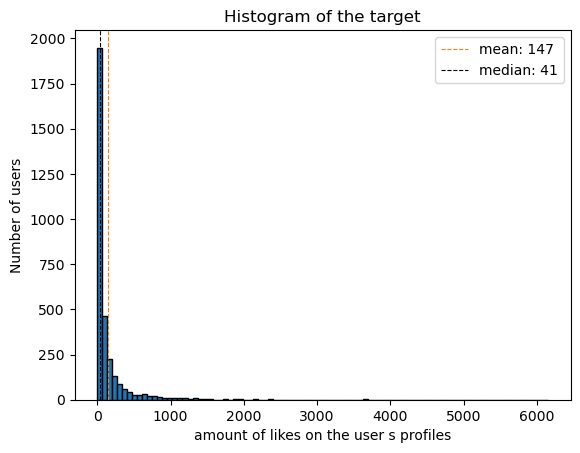

In [18]:
plt.hist(target_train, bins=90, edgecolor='black', color = '#1f77b4')
plt.title('Histogram of the target')
plt.xlabel('amount of likes on the user s profiles')
plt.ylabel('Number of users')
plt.axvline(x=target_train.mean(), color='#ff7f0e', label='mean: ' +str(round(target_train.mean())), linewidth=0.8, linestyle='--')
plt.axvline(x=target_train.median(), color='black', label='median: ' +str(round(target_train.median())), linewidth=0.8, linestyle='--')
plt.legend(loc='best')
plt.show()
print()

In [12]:
max(target_train)

6155

Although, the maximum value of target_train is 6155, the target's values are much more concentrated on the lowest values.

Let's now look at the the same histogram but diferentiating the users with and without description.

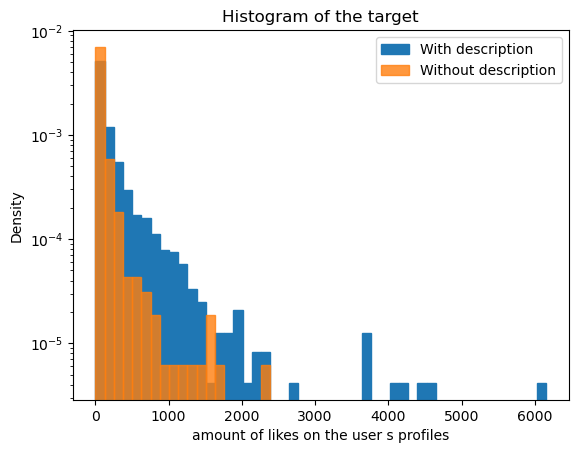

In [19]:
target_train_description = target_train[data_train['description']==1]
target_train_no_description = target_train[data_train['description']==0]

plt.hist(target_train_description, bins=np.linspace(0, max(target_train), 50), edgecolor='#1f77b4', color = '#1f77b4', density=True)
plt.hist(target_train_no_description, bins=np.linspace(0, max(target_train), 50), edgecolor='#ff7f0e', color = '#ff7f0e', alpha=0.8, density=True)
plt.title('Histogram of the target')
plt.yscale('log')
plt.xlabel('amount of likes on the user s profiles')
plt.ylabel('Density')
plt.legend(['With description', 'Without description'])
plt.show()

We can also look at this histogram, diferentiating whether the users have more or less than the median amount of pictures (4).

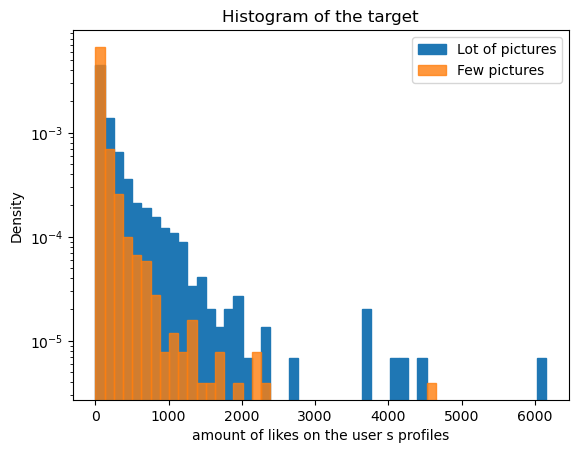

In [20]:
median_pictures = data_train['counts_pictures'].median() #computation of the median amount of pictures
target_train_lot_of_pictures = target_train[data_train['counts_pictures']>median_pictures]
target_train_few_pictures = target_train[data_train['counts_pictures']<=median_pictures]

plt.hist(target_train_lot_of_pictures, bins=np.linspace(0, max(target_train), 50), edgecolor='#1f77b4', color = '#1f77b4', density=True)
plt.hist(target_train_few_pictures, bins=np.linspace(0, max(target_train), 50), edgecolor='#ff7f0e', color = '#ff7f0e', alpha=0.8, density=True)
plt.title('Histogram of the target')
plt.xlabel('amount of likes on the user s profiles')
plt.yscale('log')
plt.ylabel('Density')
plt.legend(['Lot of pictures', 'Few pictures'])
plt.show()

Finally, we can look at this histogram diferentiating whether users are above or below the median age (22).

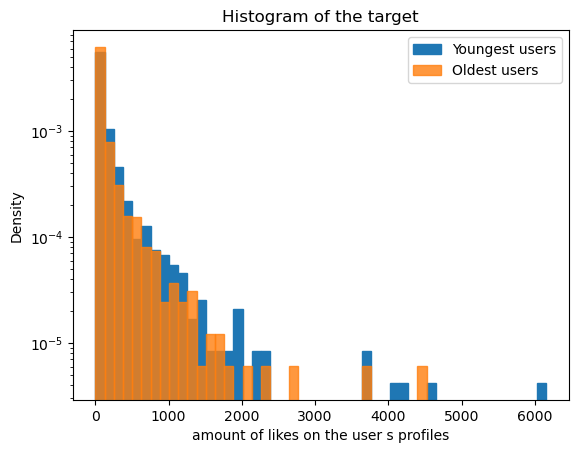

In [21]:
median_age = data_train['age'].median() #computation of the median age
target_train_oldest = target_train[data_train['age']>median_age]
target_train_youngest = target_train[data_train['age']<=median_age]

plt.hist(target_train_youngest, bins=np.linspace(0, max(target_train), 50), edgecolor='#1f77b4', color = '#1f77b4', density=True)
plt.hist(target_train_oldest, bins=np.linspace(0, max(target_train), 50), edgecolor='#ff7f0e', color = '#ff7f0e', alpha=0.8, density=True)
plt.yscale('log')
plt.title('Histogram of the target')
plt.xlabel('amount of likes on the user s profiles')
plt.ylabel('Density')
plt.legend(['Youngest users', 'Oldest users'])
plt.show()

To have a more global visualization of the interferences betwwen the features and the target, we can also look at the correlation matrix heatmap.

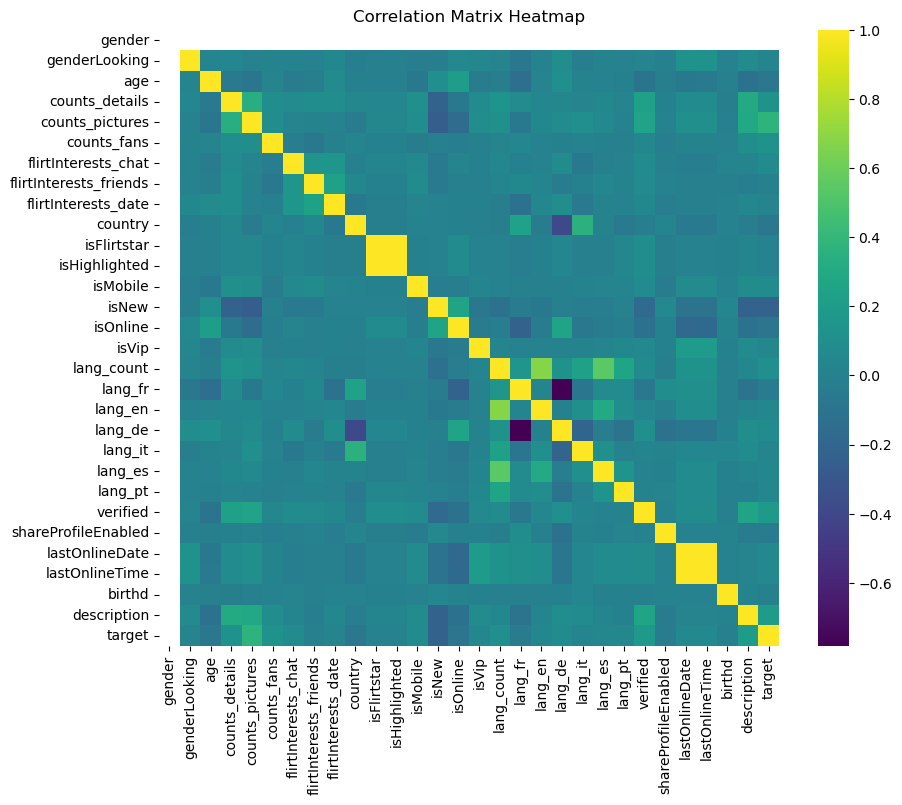

In [17]:
#we create merge_data containing data_train and target_train
merged_data = data_train
merged_data['target'] = target_train
merged_data = merged_data.drop(['isInfluencer', 'connectedToFacebook'], axis=1) #we don't want those features so we drop them

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(merged_data.corr(), annot=False, cmap='viridis', ax=ax)
ax.set_title('Correlation Matrix Heatmap')
plt.show()

## Workflow
### The model to submit

The submission consists of one file: `estimator.py`  which defines a `FeatureExtractor` class, and `Regressor` class:

- `FeatureExtractor` can (optionally) hold code to calculate and add additional features.
- `Regressor` fits the model and predicts on (new) data, as outputted by the `FeatureExtractor`. The prediction should be in the form of a (n_samples, 1) array with the values predicted.

---

An example `Estimator`, adding an additional feature based on the number of users by age, plus a regressor doing a Random Forest Regression:

##

In [18]:
from sklearn.base import BaseEstimator
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer


class Regressor(BaseEstimator):
    def __init__(self):
        self.model = RandomForestRegressor()

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        y_pred = self.model.predict(X)
        return y_pred


class FeatureExtractor(BaseEstimator):
    def fit(self, X, y):
        self.nb_users_by_age = X.groupby("age").agg({"gender": "count"}).reset_index()
        self.nb_users_by_age.columns = ["age", "nb_users"]
        return self

    def transform(self, X):
        return X.merge(self.nb_users_by_age, on="age", how="left")


def get_estimator():

    feature_extractor = FeatureExtractor()

    reg = Regressor()

    impute_missing_values = SimpleImputer(strategy="mean")

    pipe = make_pipeline(
        feature_extractor, impute_missing_values, StandardScaler(), reg
    )
    return pipe

In [19]:
model = get_estimator()
model.fit(data_train, target_train)

Pipeline(steps=[('featureextractor', FeatureExtractor()),
                ('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler()),
                ('regressor', Regressor())])

In [20]:
y_pred = model.predict(data_test)

In [14]:
y_pred.shape

(799,)

In [15]:
y_pred[:10]

array([586.93, 391.62,  13.03,  89.95, 130.55, 112.27, 113.58, 160.83,
       109.33, 286.2 ])

### Evaluation

In [16]:
from sklearn.metrics import mean_absolute_error

In [17]:
mean_absolute_error(target_test, y_pred)

181.9924851898206

### Evaluation with Cross-Validation

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

def evaluation(X, y):
    pipe = make_pipeline(
        FeatureExtractor(),
        SimpleImputer(strategy="mean"),
        StandardScaler(),
        Regressor())
    results = cross_validate(
        pipe,
        X,
        y,
        scoring=["r2", "neg_mean_absolute_error"],
        cv=5,
        verbose=1,
        return_train_score=True,
        n_jobs=-1, # Use all cores
    )

    return results

In [19]:
results = evaluation(data_train, target_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    5.0s remaining:    7.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.1s finished


In [20]:
print(
    "Training score R2: {:.3f} +- {:.3f}".format(
        np.mean(results["train_r2"]), np.std(results["train_r2"])
    )
)
print(
    "Testing score R2: {:.3f} +- {:.3f} \n".format(
        np.mean(results["test_r2"]), np.std(results["test_r2"])
    )
)

Training score R2: 0.872 +- 0.003
Testing score R2: 0.116 +- 0.073 

